In [1]:
%matplotlib notebook

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

In [3]:
# Store filepath in a variable
source_csv = "gun-violence-data.csv"

In [4]:
# Read our Data file with the pandas library
source_df = pd.read_csv(source_csv, encoding="ISO-8859-1")

In [5]:
# Show just the header
source_df.head()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0


In [6]:
#Drop columns
source_df.drop(['Unnamed: 0', 'hispanic'], axis=1, inplace=True)
source_df.head()

,year,month,intent,police,sex,age,race,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,Home,4.0
1,2012,1,Suicide,0,F,21.0,White,Street,3.0
2,2012,1,Suicide,0,M,60.0,White,Other specified,4.0
3,2012,2,Suicide,0,M,64.0,White,Home,4.0
4,2012,2,Suicide,0,M,31.0,White,Other specified,2.0


In [7]:
count = source_df["sex"].value_counts()
count

M    86349
F    14449
Name: sex, dtype: int64

In [8]:
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [86349, 14449]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

<IPython.core.display.Javascript object>


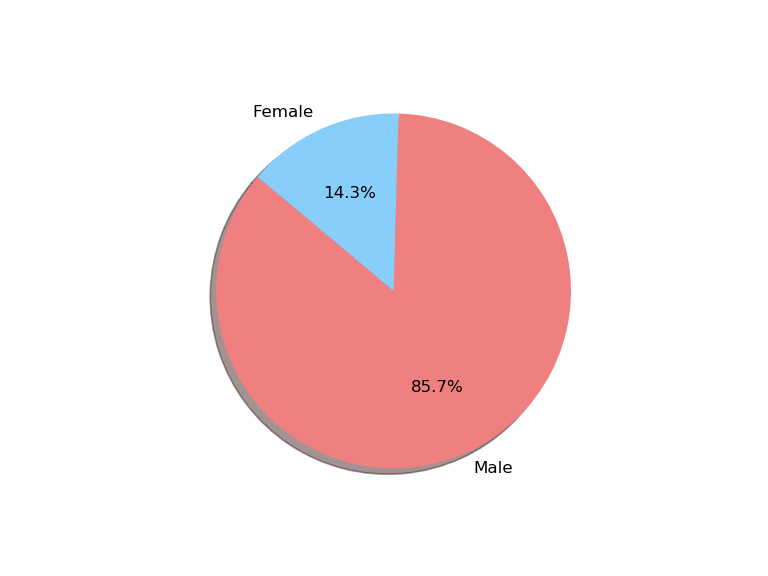

([<matplotlib.patches.Wedge at 0x1edf8676348>,
 [Text(0.450875186197527, -1.00335017141143, 'Male'),
  Text(-0.45087528013794853, 1.0033501291974436, 'Female')],
 [Text(0.2459319197441056, -0.5472819116789617, '85.7%'),
  Text(-0.24593197098433553, 0.547281888653151, '14.3%')])

In [9]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [8]:
count = source_df["intent"].value_counts()
count

Suicide         63175
Homicide        35176
Accidental       1639
Undetermined      807
Name: intent, dtype: int64

In [8]:
# Labels for the sections of our pie chart
labels = ["Suicide","Undetermined", "Homicide", "Accidental"]

# The values of each section of the pie chart
sizes = [63175, 807, 35176, 1639]

# The colors of each section of the pie chart
colors = ["green", "red", "orange", "lightskyblue"]

<IPython.core.display.Javascript object>


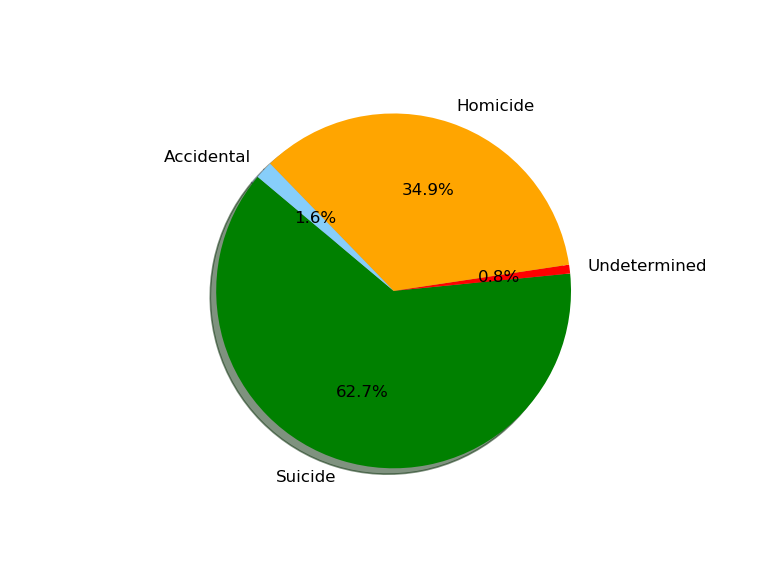

([<matplotlib.patches.Wedge at 0x23a362615c8>,
 [Text(-0.3249880259895165, -1.0508961808682329, 'Suicide'),
  Text(1.091629486947247, 0.13544394865511916, 'Undetermined'),
  Text(0.35212691325506046, 1.0421164219805115, 'Homicide'),
  Text(-0.8054458764606135, 0.7491708350520555, 'Accidental')],
 [Text(-0.1772661959942817, -0.5732160986553997, '62.7%'),
  Text(0.5954342656075892, 0.0738785174482468, '0.8%'),
  Text(0.19206922541185115, 0.5684271392620971, '34.9%'),
  Text(-0.43933411443306186, 0.40863863730112115, '1.6%')])

In [9]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [9]:
count = source_df["age"].value_counts()
count

22.0     2712
21.0     2504
23.0     2472
24.0     2437
26.0     2231
         ... 
99.0        6
102.0       2
101.0       2
100.0       1
107.0       1
Name: age, Length: 104, dtype: int64

In [11]:
# Create the bins in which Data will be held  
bins = [0, 1, 19, 26, 65, 81]

# Create the names for the four bins
group_names = ["0-18", "19-25", "26-65", "66-80", "81"]

In [12]:
source_df["Ages"] = pd.cut(source_df["age"], bins, labels=group_names)
source_df

,year,month,intent,police,sex,age,race,place,education,Ages
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,Home,4.0,66-80
1,2012,1,Suicide,0,F,21.0,White,Street,3.0,26-65
2,2012,1,Suicide,0,M,60.0,White,Other specified,4.0,66-80
3,2012,2,Suicide,0,M,64.0,White,Home,4.0,66-80
4,2012,2,Suicide,0,M,31.0,White,Other specified,2.0,66-80
...,...,...,...,...,...,...,...,...,...,...
100793,2014,12,Homicide,0,M,36.0,Black,Home,2.0,66-80
100794,2014,12,Homicide,0,M,19.0,Black,Street,2.0,19-25
100795,2014,12,Homicide,0,M,20.0,Black,Street,2.0,26-65
100796,2014,12,Homicide,0,M,22.0,Hispanic,Street,1.0,26-65


In [13]:
# Creating a group based off of the bins
df = source_df.groupby("Ages")
df.max()

,year,month,police,sex,age,race,education
Ages,,,,,,,
0-18,2014,12,0,M,1.0,White,5.0
19-25,2014,12,1,M,19.0,White,5.0
26-65,2014,12,1,M,26.0,White,5.0
66-80,2014,12,1,M,65.0,White,5.0
81,2014,12,1,M,81.0,White,5.0


In [13]:
ages_counts = source_df["Ages"].value_counts().sort_index()
ages_counts.head()

0-18        38
19-25     7637
26-65    16805
66-80    60598
81       11541
Name: Ages, dtype: int64

In [11]:
users = [38, 7637, 16805, 60598, 11541]
x_axis = np.arange(len(ages_counts))

<IPython.core.display.Javascript object>


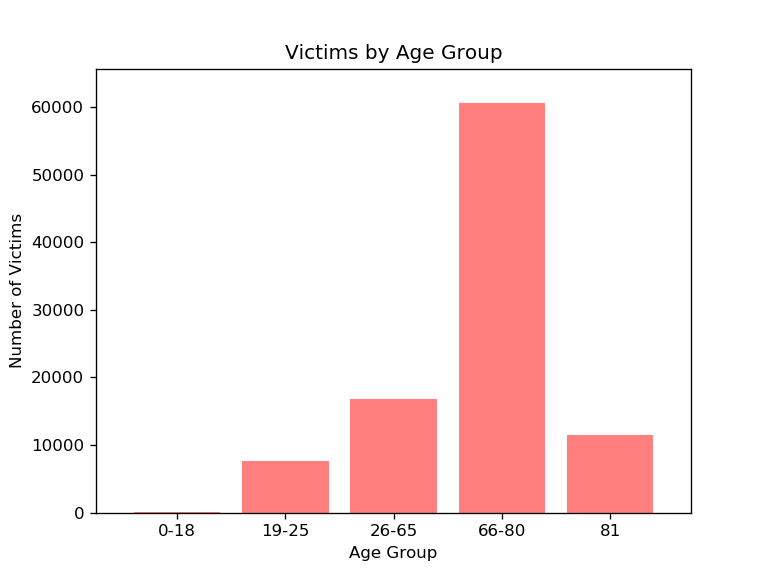

<BarContainer object of 5 artists>

In [12]:
plt.bar(ages_counts.index, users, color='r', alpha=0.5, align="center")

In [13]:
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["0-18", "19-25", "26-65", "66-80", "81"])

([<matplotlib.axis.XTick at 0x14a86a374c8>,
 <a list of 5 Text xticklabel objects>)

In [14]:
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(users)+5000)

(0, 65598)

In [15]:
plt.title("Victims by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Victims")
plt.savefig('Victims by Age Group')

In [27]:
#int_df = source_df.groupby("intent")
#int_df.max()

,year,month,police,sex,age,race,education,Ages
intent,,,,,,,,
Accidental,2014,12,0,M,96.0,White,5.0,81
Homicide,2014,12,1,M,107.0,White,5.0,81
Suicide,2014,12,0,M,102.0,White,5.0,81
Undetermined,2014,12,0,M,96.0,White,5.0,81


In [14]:
intent_counts = df["intent"].value_counts().sort_index()
intent_counts.head(100)

Ages   intent      
0-18   Accidental          4
       Homicide           34
19-25  Accidental        325
       Homicide         4553
       Suicide          2667
       Undetermined       92
26-65  Accidental        274
       Homicide        10111
       Suicide          6266
       Undetermined      154
66-80  Accidental        832
       Homicide        19423
       Suicide         39869
       Undetermined      473
81     Accidental        161
       Homicide          850
       Suicide         10461
       Undetermined       69
Name: intent, dtype: int64

In [19]:
# Labels for the sections of our pie chart
labels = ["Suicide","Undetermined", "Homicide", "Accidental"]

# The values of each section of the pie chart
sizes = [39869, 473, 19423, 832]

# The colors of each section of the pie chart
colors = ["green", "red", "orange", "lightskyblue"]

<IPython.core.display.Javascript object>


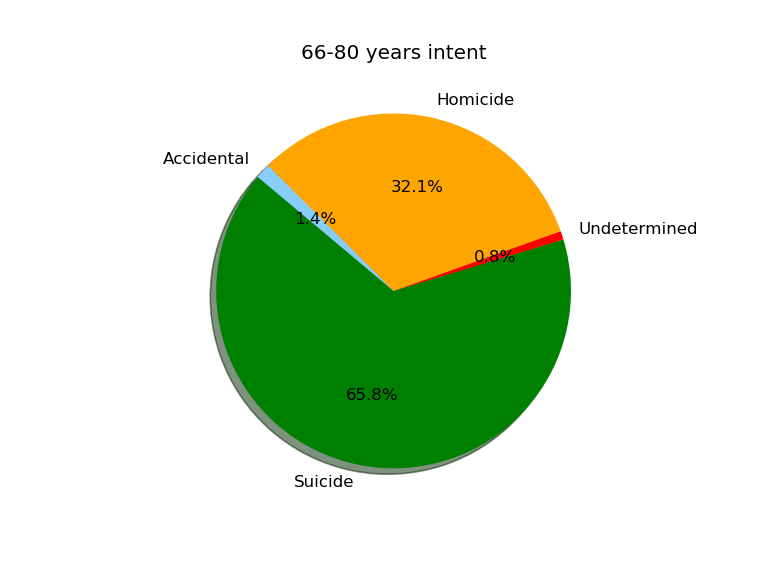

([<matplotlib.patches.Wedge at 0x286d49c5fc8>,
 [Text(-0.2206471280291785, -1.0776431899717436, 'Suicide'),
  Text(1.0445951016893473, 0.34470432768768955, 'Undetermined'),
  Text(0.24066487311102158, 1.0733500914661795, 'Homicide'),
  Text(-0.81137577783186, 0.7427444696177443, 'Accidental')],
 [Text(-0.12035297892500643, -0.5878053763482237, '65.8%'),
  Text(0.5697791463760076, 0.18802054237510338, '0.8%'),
  Text(0.1312717489696481, 0.5854636862542797, '32.1%'),
  Text(-0.44256860609010545, 0.4051333470642241, '1.4%')])

In [20]:
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [21]:
plt.title("66-80 years intent")
plt.savefig('66-80 years intent')

In [15]:
# Labels for the sections of our pie chart
labels = ["Suicide","Undetermined", "Homicide", "Accidental"]

# The values of each section of the pie chart
sizes = [6266, 154, 10111, 274]

# The colors of each section of the pie chart
colors = ["green", "red", "orange", "lightskyblue"]

<IPython.core.display.Javascript object>


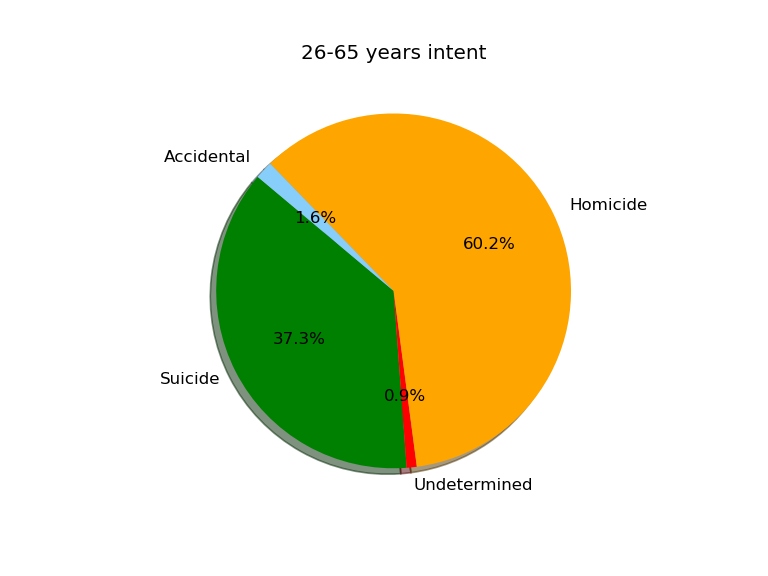

([<matplotlib.patches.Wedge at 0x21cec20b608>,
 [Text(-0.9790963766837136, -0.5013684126117478, 'Suicide'),
  Text(0.11270878678657589, -1.0942105507538749, 'Undetermined'),
  Text(0.9900964216705018, 0.47927974690703157, 'Homicide'),
  Text(-0.8053416764669015, 0.7492828465576139, 'Accidental')],
 [Text(-0.5340525691002074, -0.2734736796064079, '37.3%'),
  Text(0.06147752006540502, -0.5968421185930226, '0.9%'),
  Text(0.5400525936384555, 0.26142531649474443, '60.2%'),
  Text(-0.43927727807285527, 0.4086997344859712, '1.6%')])

In [16]:
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [17]:
plt.title("26-65 years intent")
plt.savefig('26-65 years intent')